In [1]:
# Instalar gdown (si no está instalado)
!pip install gdown --quiet

# Configurar los datos del archivo
YOUR_FILE_ID = '14DPS9fv-6tcqaS5qfqm7gOP5VPu93NEk'
filename = 'catsdogs_small.zip'

# Descargar el archivo desde Google Drive
!gdown --id {YOUR_FILE_ID} -O {filename}

# Verificar que el archivo se descargó
import os
if os.path.exists(filename):
    print(f"Archivo '{filename}' descargado correctamente.")
else:
    print("Error al descargar el archivo.")


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=14DPS9fv-6tcqaS5qfqm7gOP5VPu93NEk
From (redirected): https://drive.google.com/uc?id=14DPS9fv-6tcqaS5qfqm7gOP5VPu93NEk&confirm=t&uuid=1e332b04-58dd-49dc-8d6b-d3ef2a7b33d3
To: /content/catsdogs_small.zip
100% 91.0M/91.0M [00:03<00:00, 30.0MB/s]
Archivo 'catsdogs_small.zip' descargado correctamente.


In [2]:
import zipfile

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('extracted')
    print(f"Archivo extraído en la carpeta 'extracted'.")

Archivo extraído en la carpeta 'extracted'.


## Normal data

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(rescale=1.0/255)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Crear modelo
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Cuarta capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar los datos
    Flatten(),

    # Capa densa totalmente conectada
    Dense(512, activation='relu'),

    # Capa de salida con activación sigmoide (para clasificación binaria)
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar modelo
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator
)

# Guardar modelo
model.save('cats_dogs_classifier.h5')
print("Modelo guardado como 'cats_dogs_classifier.h5'.")

# Evaluar modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - accuracy: 0.4980 - loss: 0.7037 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.4881 - loss: 0.6953 - val_accuracy: 0.4850 - val_loss: 0.6937
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.5190 - loss: 0.6922 - val_accuracy: 0.5590 - val_loss: 0.6826
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5267 - loss: 0.6814 - val_accuracy: 0.6000 - val_loss: 0.6841
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.5718 - loss: 0.6824 - val_accuracy: 0.6570 - val_loss: 0.6380
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6262 - loss: 0.6459 - val_accuracy: 0.6760 - val_loss: 0.5910
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.6698 - loss: 0.5932 - val_accuracy: 0.6260 - val_loss: 0.6341
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.7170 - loss: 0.5464 - val_accuracy: 0.6700 - val_los

Modelo guardado como 'cats_dogs_classifier.h5'.
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6868 - loss: 3.0141
Precisión en el conjunto de validación: 0.71


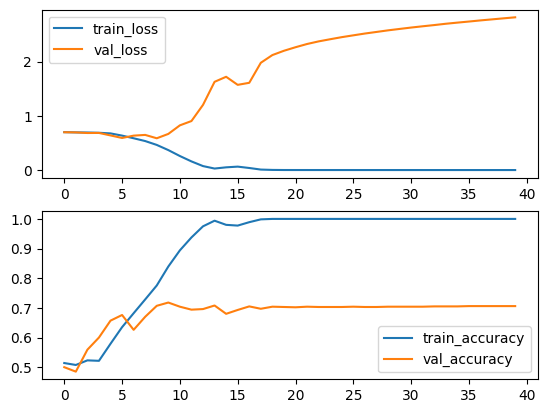

In [5]:
import matplotlib.pyplot as plt

# Graficamos la perdida y el accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

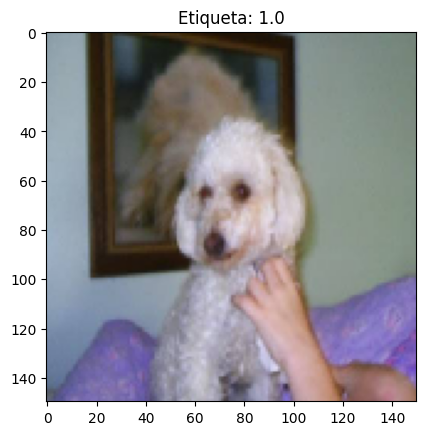

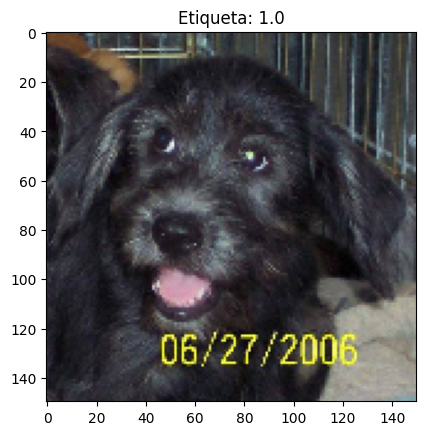

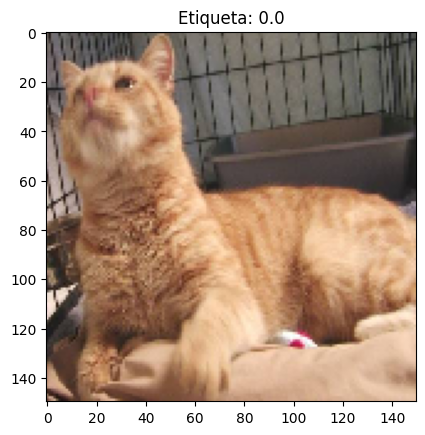

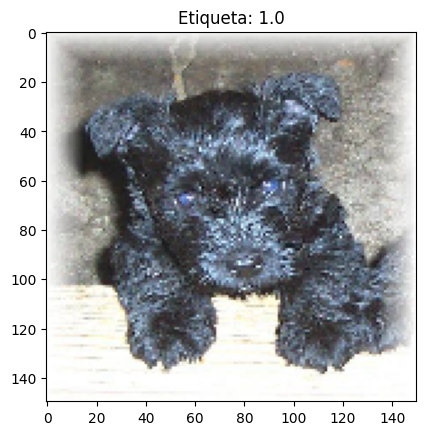

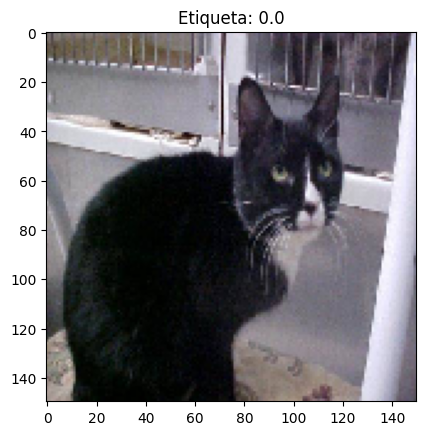

In [6]:
# Show images of sample
import matplotlib.pyplot as plt
import numpy as np

# Muestra la shape del train_generator

for data_batch, labels_batch in train_generator:
    # Muestra algunas imagenes con su etiqueta
    for i in range(5):
        plt.imshow(data_batch[i])
        plt.title(f"Etiqueta: {labels_batch[i]}")
        plt.show()
    break

## Data augmentation

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Crear modelo
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Cuarta capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar los datos
    Flatten(),

    # Capa densa totalmente conectada
    Dense(512, activation='relu'),

    # Capa de salida con activación sigmoide (para clasificación binaria)
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar modelo
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Guardar modelo
model.save('cats_dogs_classifier.h5')
print("Modelo guardado como 'cats_dogs_classifier.h5'.")

# Evaluar modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.5041 - loss: 0.7055 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.5315 - loss: 0.6915 - val_accuracy: 0.5930 - val_loss: 0.6730
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.5375 - loss: 0.6850 - val_accuracy: 0.5420 - val_loss: 0.6736
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.5643 - loss: 0.6777 - val_accuracy: 0.5440 - val_loss: 0.6827
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.6073 - loss: 0.6673 - val_accuracy: 0.6280 - val_loss: 0.6203
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.6386 - loss: 0.6356 - val_accuracy: 0.6690 - val_loss: 0.6208
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.6317 - loss: 0.6332 - val_accuracy: 0.6300 - val_loss: 0.6301
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.6593 - loss: 0.6125 - val_accuracy: 0.657

Modelo guardado como 'cats_dogs_classifier.h5'.
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7592 - loss: 0.5015
Precisión en el conjunto de validación: 0.75


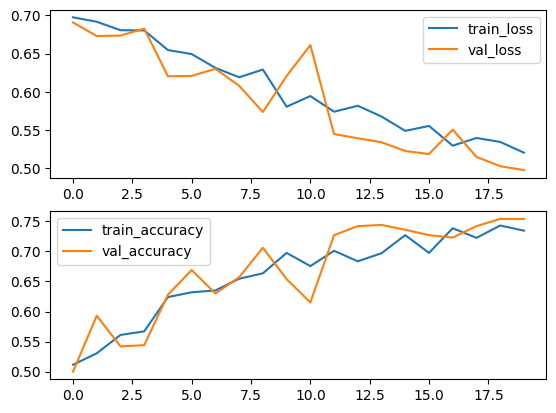

In [8]:
import matplotlib.pyplot as plt

# Graficamos la perdida y el accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [9]:
# Hacemos una predicción con la validación

for images, labels in validation_generator:
    predictions = model.predict(images)
    # Show predictions
    for i in range(10):
        print(f"Predicción: {predictions[i][0]}, Etiqueta: {labels[i]}")
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicción: 0.3469245135784149, Etiqueta: 0.0
Predicción: 0.5571104288101196, Etiqueta: 1.0
Predicción: 0.8030732274055481, Etiqueta: 1.0
Predicción: 0.2798420190811157, Etiqueta: 1.0
Predicción: 0.48344743251800537, Etiqueta: 1.0
Predicción: 0.11504621803760529, Etiqueta: 0.0
Predicción: 0.15380223095417023, Etiqueta: 0.0
Predicción: 0.8112784624099731, Etiqueta: 1.0
Predicción: 0.10612770169973373, Etiqueta: 0.0
Predicción: 0.482574999332428, Etiqueta: 0.0


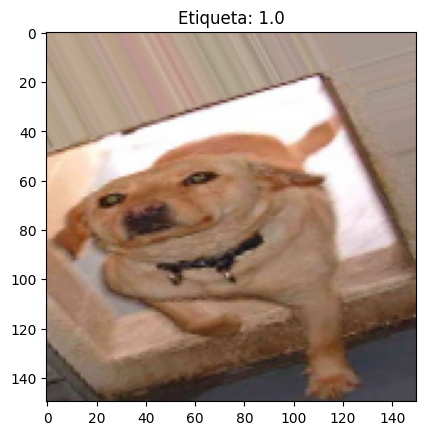

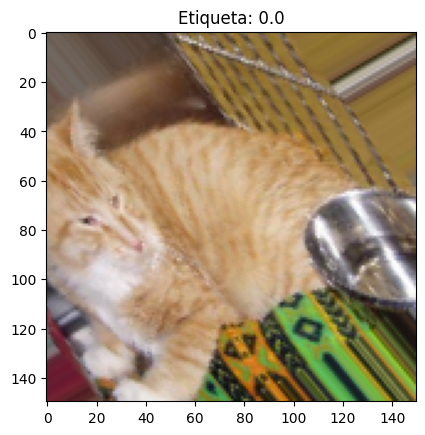

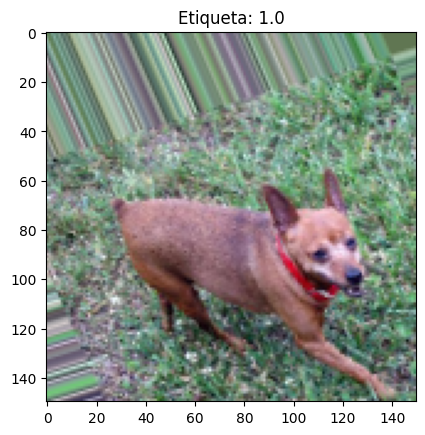

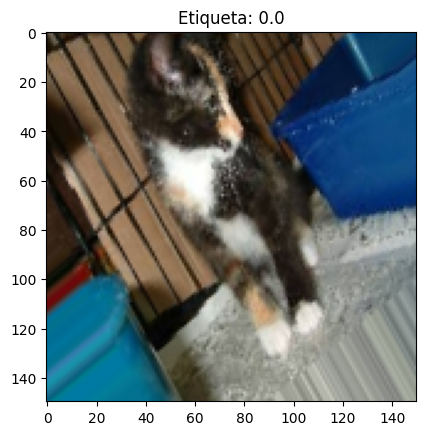

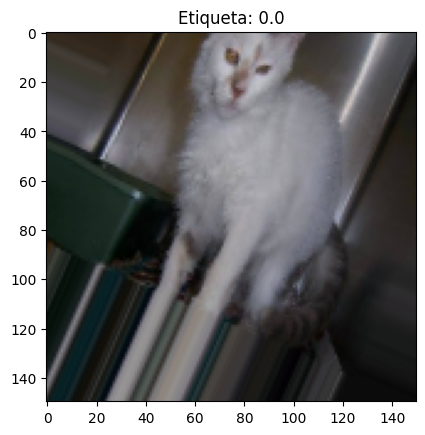

In [10]:
# Show images of sample
import matplotlib.pyplot as plt
import numpy as np

# Muestra la shape del train_generator

for data_batch, labels_batch in train_generator:
    # Muestra algunas imagenes con su etiqueta
    for i in range(5):
        plt.imshow(data_batch[i])
        plt.title(f"Etiqueta: {labels_batch[i]}")
        plt.show()
    break

## VGG-16

Hacemos transfer learning a un modelo de VGG-16

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Cargar VGG-16 preentrenada
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar capas de la base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas para clasificación
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Para CIFAR-10, cambiar a 10 clases

# Crear el modelo final
vgg16_finetuned = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
vgg16_finetuned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = vgg16_finetuned.fit(train_generator, epochs=10, batch_size=32)

# Evaluar modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 289ms/step - accuracy: 0.5947 - loss: 1.1753
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 217ms/step - accuracy: 0.8061 - loss: 0.4293
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.8191 - loss: 0.3986
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.8260 - loss: 0.4022
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.8261 - loss: 0.3736
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.8079 - loss: 0.4022
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.8222 - loss: 0.3891
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.8363 - loss: 0.3529
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.8462 - loss: 0.3573
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.8449 - loss: 0.3595
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7386 - loss: 0.5048
Precisión en el conjunto de validación: 0.75


Obtenemos el mismo resultado que antes con menos epocas de entrenamiento

## VGG-19

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import os
from tensorflow.keras.applications import VGG19

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Cargar VGG-19 preentrenada
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar capas de la base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas para clasificación
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Para CIFAR-10, cambiar a 10 clases

# Crear el modelo final
vgg19_finetuned = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
vgg19_finetuned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = vgg19_finetuned.fit(train_generator, epochs=10, batch_size=32)

# Evaluar modelo
loss, accuracy = vgg19_finetuned.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.5616 - loss: 1.1774
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.7361 - loss: 0.5339
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - accuracy: 0.7608 - loss: 0.4809
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step - accuracy: 0.8005 - loss: 0.4341
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.7940 - loss: 0.4443
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - accuracy: 0.8363 - loss: 0.3946
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.8131 - loss: 0.4134
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.8036 - loss: 0.4073
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.7934 - loss: 0.4205
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.8225 - loss: 0.3985
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.8757 - loss: 0.2969
Precisión en el conjunto de validación: 0.89


VGG-19 mejora su exactitud

## Inception V3

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
import os

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Cargar InceptionV3 preentrenada
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar capas de la base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas para clasificación
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Para CIFAR-10, cambiar a 10 clases

# Crear el modelo final
inceptionv3_finetuned = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
inceptionv3_finetuned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = inceptionv3_finetuned.fit(train_generator, epochs=10, batch_size=32)

# Evaluar el modelo
loss, accuracy = inceptionv3_finetuned.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - accuracy: 0.7267 - loss: 7.3687
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.8890 - loss: 0.8391
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.8936 - loss: 0.2846
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.9248 - loss: 0.1739
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.9239 - loss: 0.1944
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.9094 - loss: 0.2358
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9087 - loss: 0.2322
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.9334 - loss: 0.1885
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.9236 - loss: 0.1755
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.9206 - loss: 0

Mejora Aún más la exactitud

## DenseNet121

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
import os

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Cargar DenseNet121 preentrenada
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar capas de la base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas para clasificación
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Para CIFAR-10, cambiar a 10 clases

# Crear el modelo final
densenet121_finetuned = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
densenet121_finetuned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = densenet121_finetuned.fit(train_generator, epochs=10, batch_size=32)

# Evaluar el modelo
loss, accuracy = densenet121_finetuned.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 363ms/step - accuracy: 0.8056 - loss: 2.5446
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.8923 - loss: 1.0933
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.9260 - loss: 0.1750
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.9321 - loss: 0.1815
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.9381 - loss: 0.1655
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9343 - loss: 0.1647
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.9261 - loss: 0.1643
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.9410 - loss: 0.1437
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9368 - loss: 0.1500
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.9383 - loss: 0

In [18]:
from tensorflow.keras.applications import NASNetLarge

# Configurar rutas de entrenamiento y validación
base_dir = os.path.join('extracted/catsdogs_small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Cargar NASNetLarge preentrenado sin la capa superior
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir capas personalizadas según tu necesidad
from tensorflow.keras.layers import Flatten, Dense, Dropout
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Ejemplo con 10 clases

# Crear el modelo
model = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = densenet121_finetuned.fit(train_generator, epochs=10, batch_size=32)

# Evaluar el modelo
loss, accuracy = densenet121_finetuned.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.9393 - loss: 0.1603
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9395 - loss: 0.1641
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.9476 - loss: 0.1351
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.9555 - loss: 0.1138
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - accuracy: 0.9534 - loss: 0.1266
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.9401 - loss: 0.1437
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.9385 - loss: 0.1497
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.9491 - loss: 0.1258
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.9483 - loss: 0.1254
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9401 - loss: 0.1380
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc